# **Random Forest model for classification**

Assignment Overview
This assignment is important for you to demonstrate your ability to utilize the Random Forests model for classification and regression and compare your results on train and test data.



---

Requirements:
* Download the following datasets and perform the necessary preprocessing depending on the task assigned to the dataset.
 * Bank Marketing Dataset (Classification, target = "bank term deposit")
 * U.S. Pollution Dataset (Regression, target = "CO AQI")
* Perform EDA on both datasets
* Create a Random Forest model for each dataset
* Report appropriate evaluation metrics for each model
* Compare the results of your models on the test data to the results on your train data and baseline models

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

#plt.style.use("seaborn")

In [140]:
Bank_Marketingdf = pd.read_csv('/content/bank-full.csv')
Bank_Marketingdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [141]:
Bank_Marketingdf.shape

(45211, 17)

In [142]:
Bank_Marketingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [143]:
# Number of Unique values in each columns.
Bank_Marketingdf.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [144]:
Bank_Marketingdf.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [145]:
Bank_Marketingdf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [146]:
Bank_Marketingdf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [147]:
# To check duplicated values 
print(Bank_Marketingdf.duplicated().value_counts()) 

False    45211
dtype: int64


In [148]:
# Lets count numbers of row for 'y' type
Bank_Marketingdf.groupby("y").size()

y
no     39922
yes     5289
dtype: int64

In [149]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
var_numerical = ["age", "balance","day","duration", "campaign", "pdays", "previous"]
print(len(var_categorical), len(var_numerical))

9 7


# **EDA**
# **Exploratory Data Analysis**

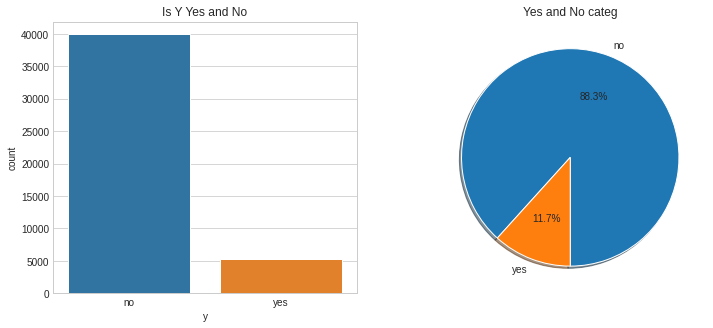

In [150]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=Bank_Marketingdf)
plt.title("Is Y Yes and No")
plt.subplot(1,2,2)
labels =Bank_Marketingdf['y'].value_counts(sort = True).index
sizes = Bank_Marketingdf['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Yes and No categ',size = 12)
plt.show()

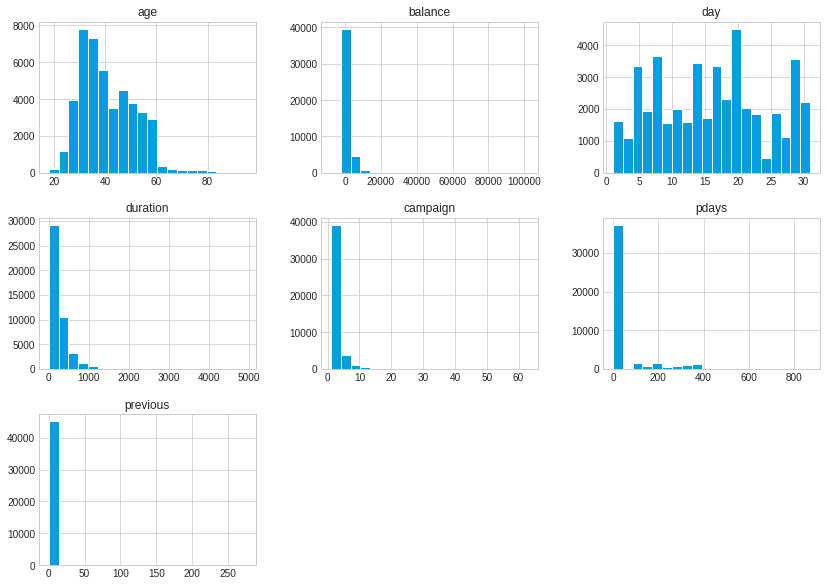

In [151]:
plt.style.use('seaborn-whitegrid')

Bank_Marketingdf.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

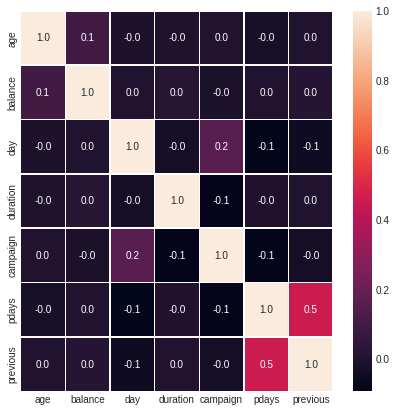

In [152]:
#heatmap for dataset
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(Bank_Marketingdf.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Job
Marital
Education
Default
Housing
Loan
Contact
Month
Poutcome


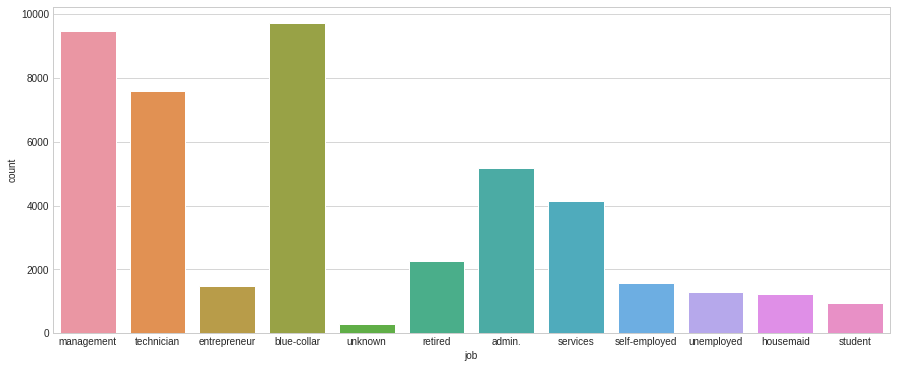

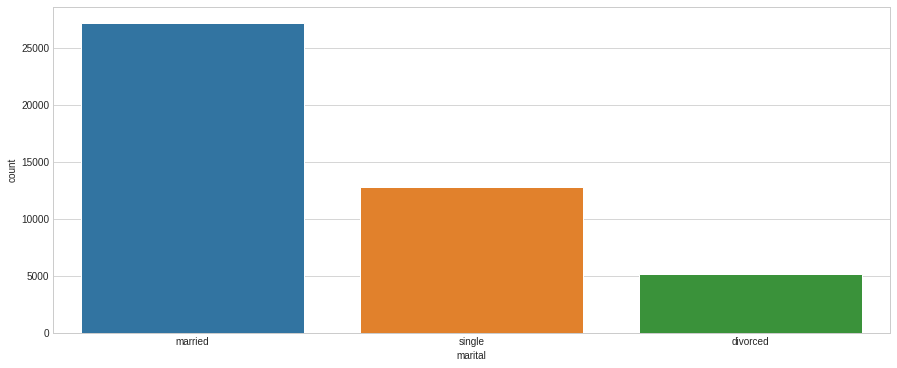

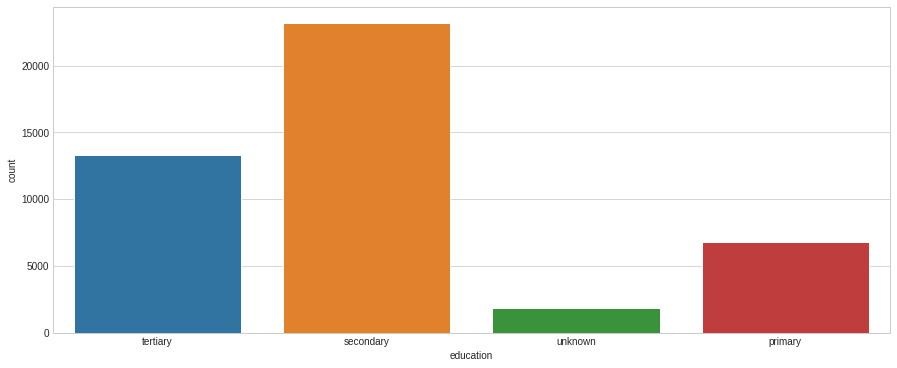

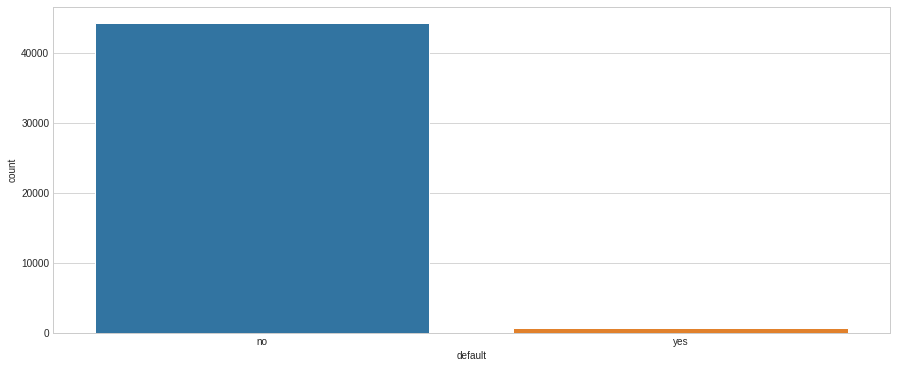

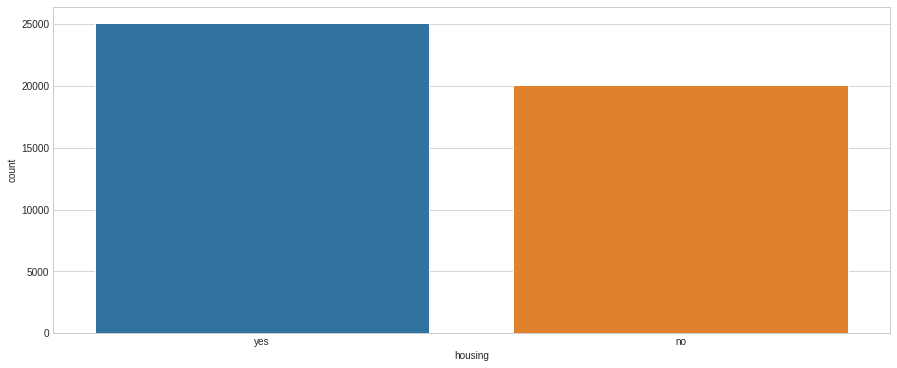

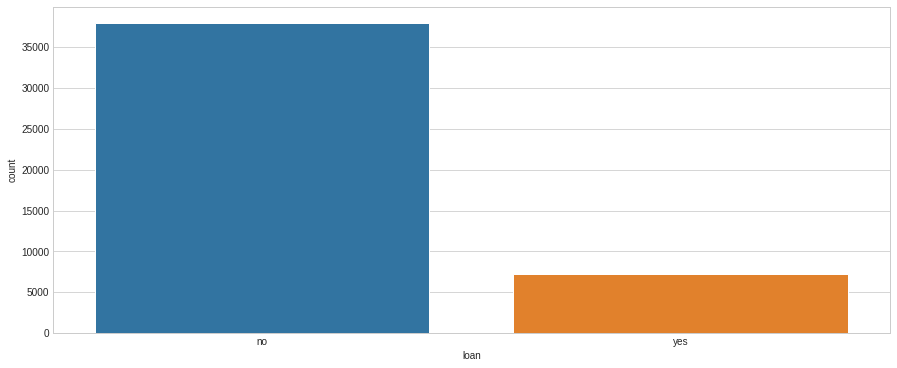

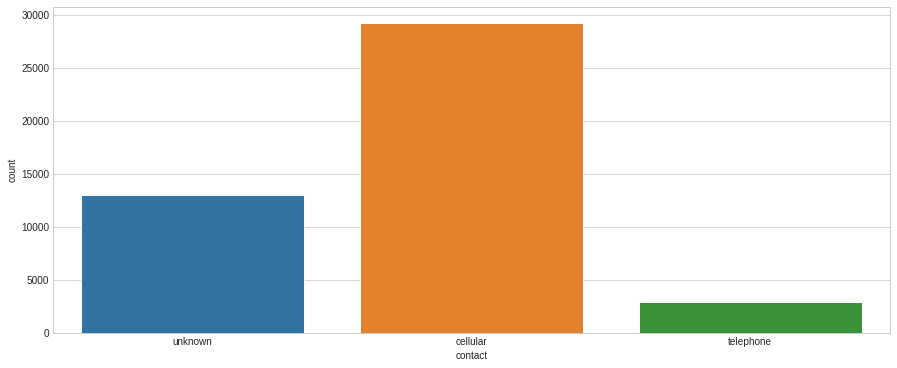

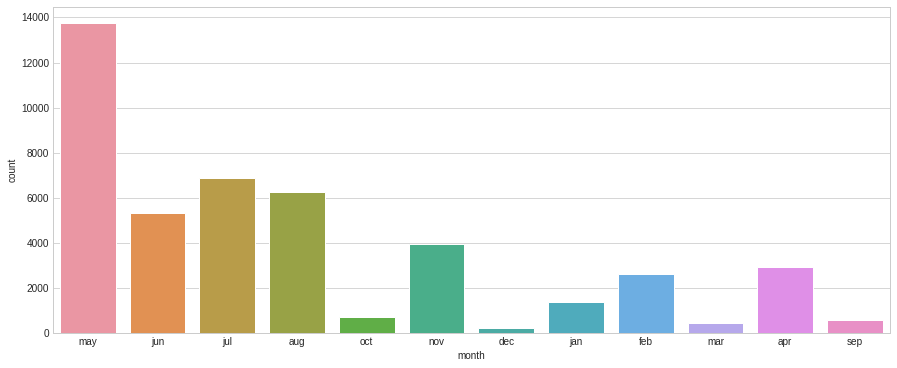

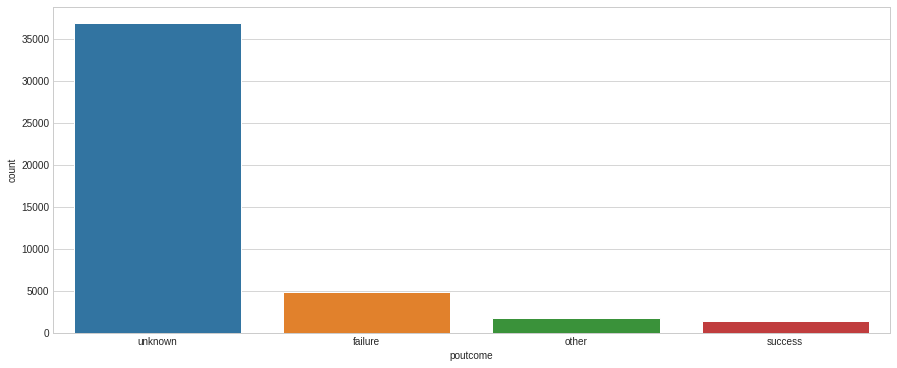

In [153]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = Bank_Marketingdf[column])
    plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


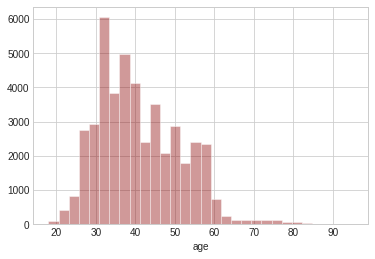

In [154]:
sns.distplot(Bank_Marketingdf['age'].dropna(),kde=False,color='darkred',bins=30)

Job


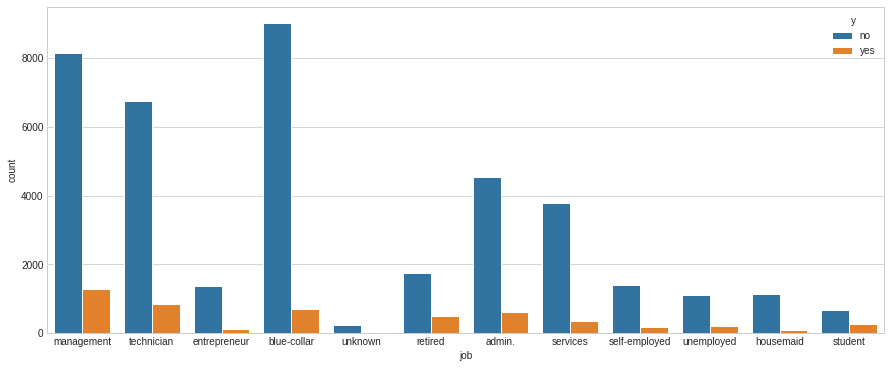

Marital


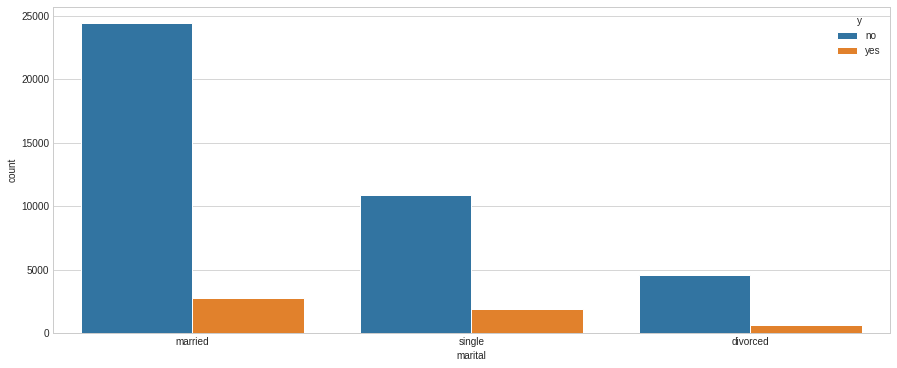

Education


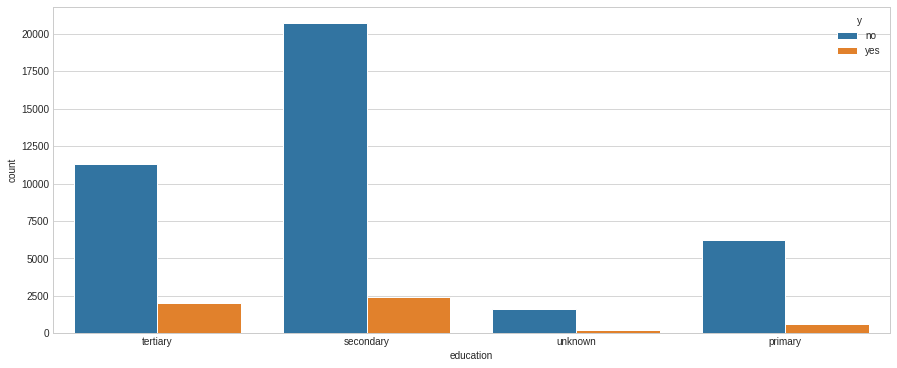

Default


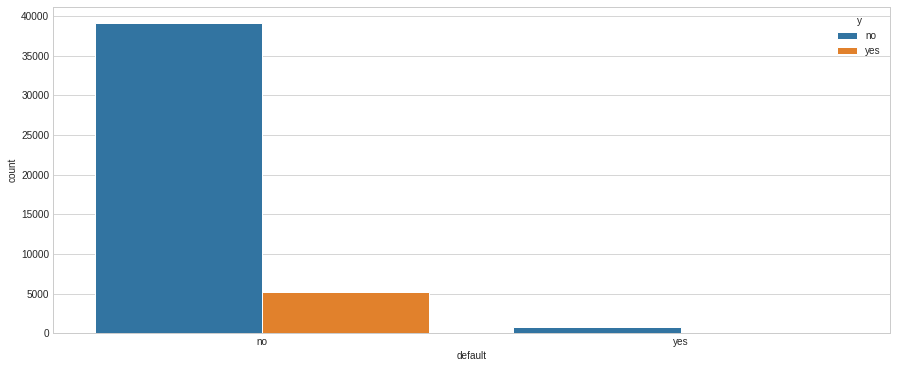

Housing


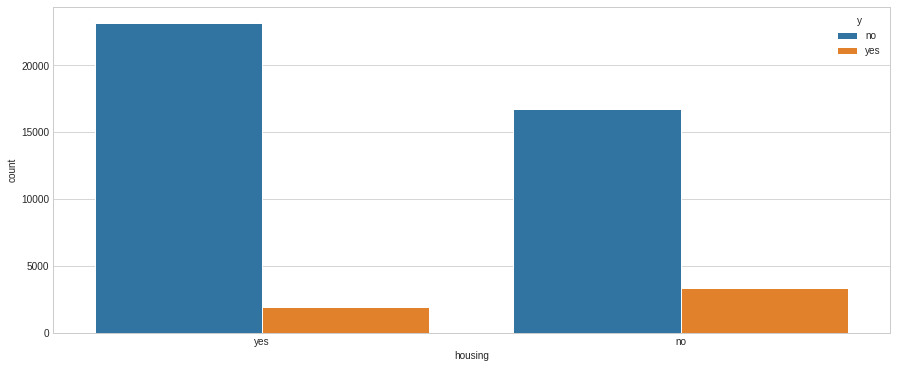

Loan


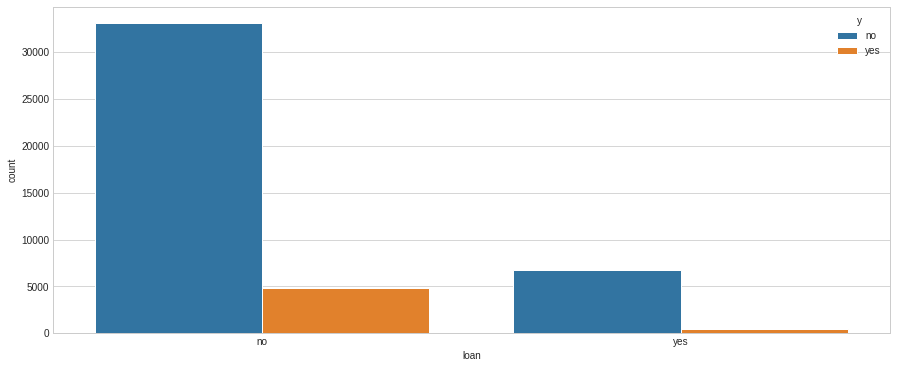

Contact


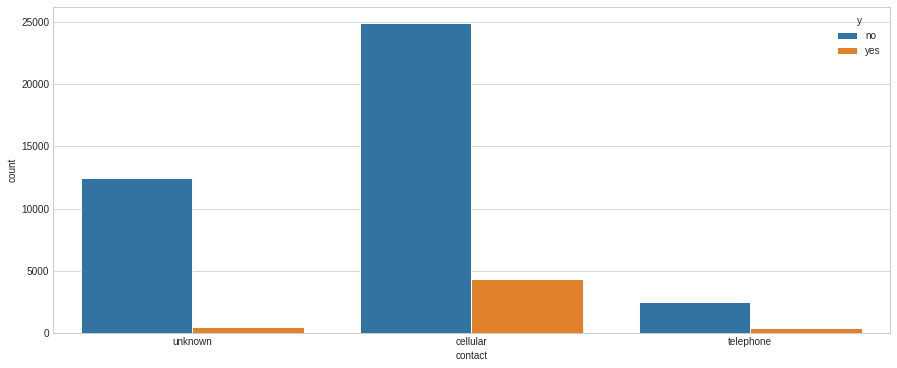

Month


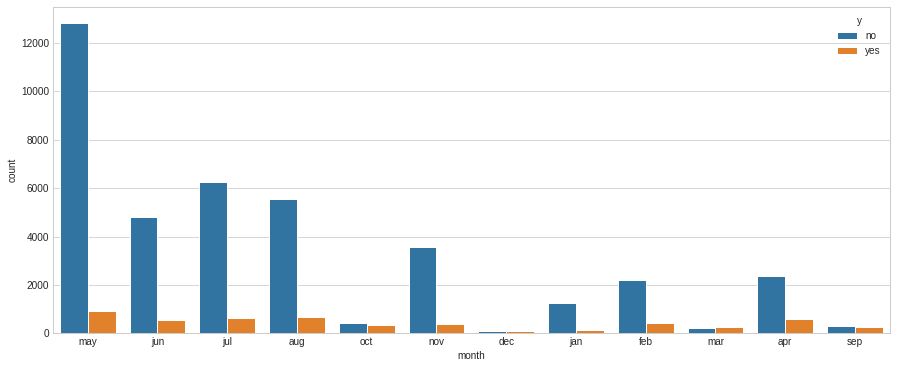

Poutcome


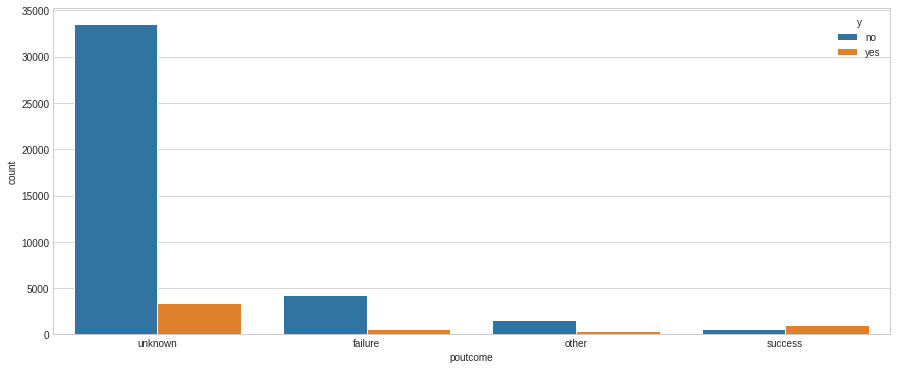

In [155]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = Bank_Marketingdf[column], hue=Bank_Marketingdf["y"])
    plt.show()

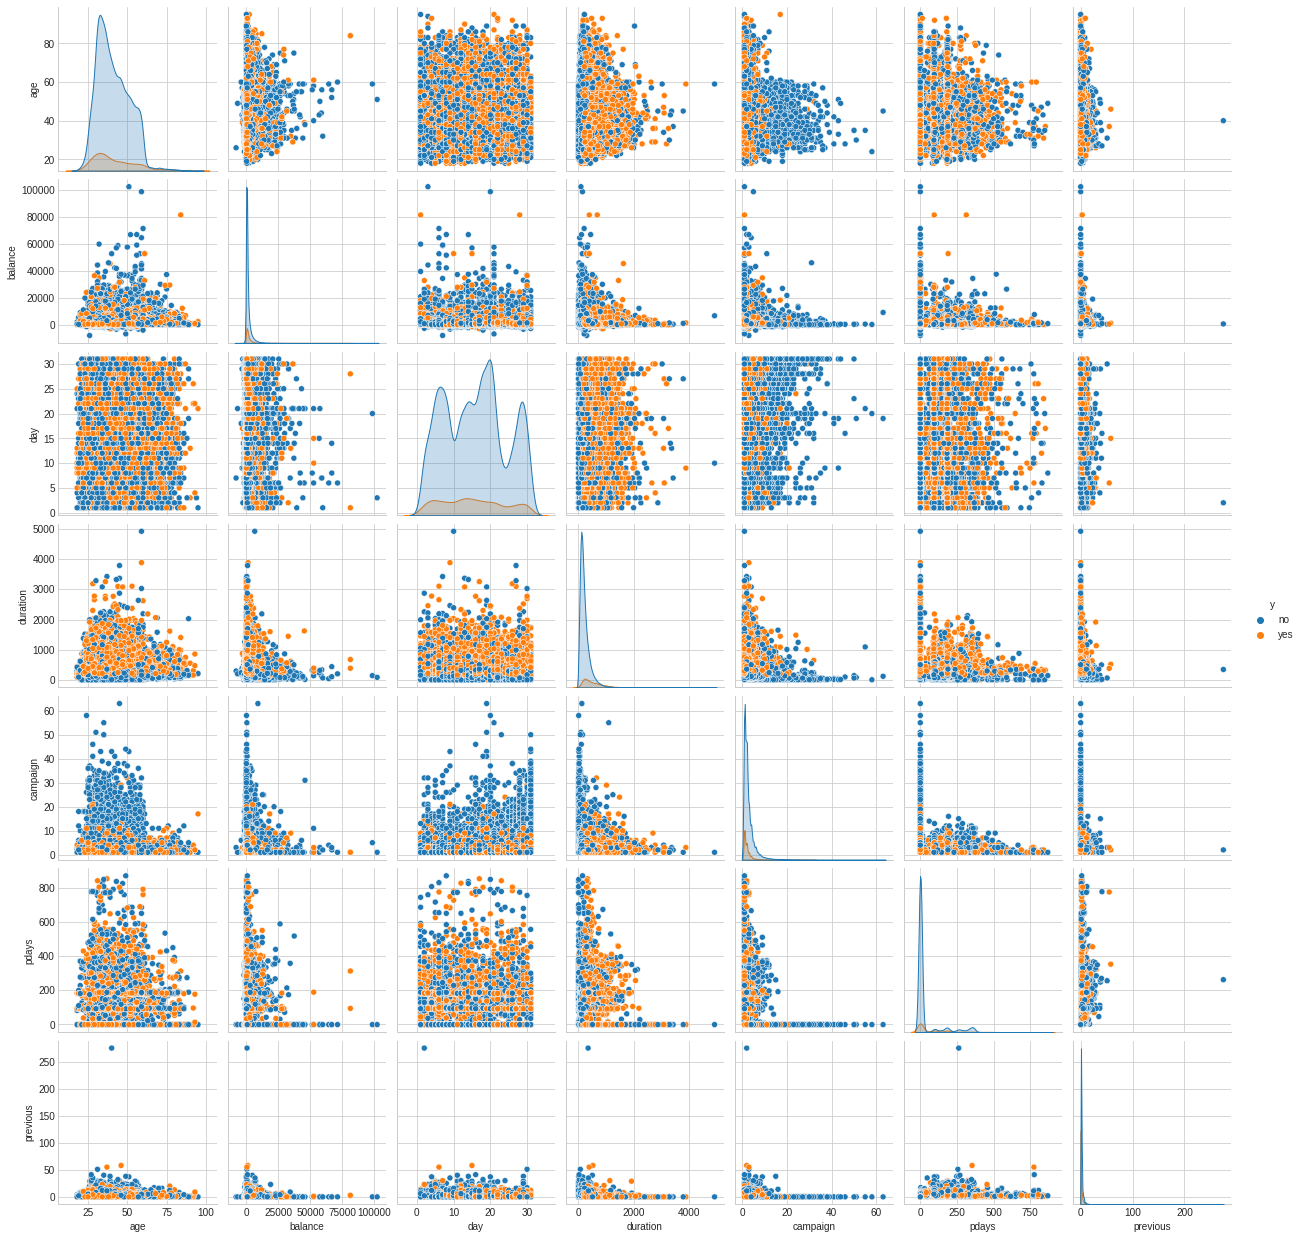

In [156]:
# visualizing numerical columns
sns.pairplot(hue='y', data = Bank_Marketingdf)
plt.show()

# **Preprocessing, Data Cleaning, and Feature Engineering**

In [157]:
Bank_Marketingdf.drop(["default"], axis = 1, inplace=True)

In [158]:
var_categorical = list(set(var_categorical) - set(['default']))

In [159]:
Bank_Marketingdf.dropna(inplace=True)

In [160]:
Bank_Marketingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.9+ MB


**One Hot Encoding**

In [161]:
# Get the dummy variables for ["y"]
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 
# (dropping redundant column)

y = pd.get_dummies(Bank_Marketingdf['y'],drop_first=True)

In [162]:
Bank_Marketingdf.drop(['y'],axis=1,inplace=True)

In [163]:
Bank_Marketingdf = pd.concat([Bank_Marketingdf,y],axis=1)

In [164]:
Bank_Marketingdf.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,yes
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [165]:
Bank_Marketingdf.rename(columns = {'yes':'y'}, inplace = True)

In [166]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["job", "marital", "education","housing", "loan", "contact", "month", "poutcome"]

# One Hot encode the column data sets
one_hot_bank = one_hot.fit_transform(Bank_Marketingdf[col_names]).toarray()


In [167]:
# Look at the categories
one_hot.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [168]:
one_hot_bank

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [169]:
one_hot.categories_[0]

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [170]:
one_hot.categories_[1]

array(['divorced', 'married', 'single'], dtype=object)

In [171]:
one_hot.categories_[2]

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [172]:
one_hot.categories_[3]

array(['no', 'yes'], dtype=object)

In [173]:
one_hot.categories_[4]

array(['no', 'yes'], dtype=object)

In [174]:
one_hot.categories_[5]

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [175]:
one_hot.categories_[6]

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [176]:
one_hot.categories_[7]

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [177]:
col_names

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [178]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [179]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["job", "marital", "education","housing", "loan", "contact", "month", "poutcome"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [180]:
one_hot_bank.shape

(45211, 42)

In [181]:
one_hot_bank

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [182]:
# Cast One Hot Encoded values into a dataframe

ohebankdf= pd.DataFrame(
    one_hot_bank,
    index=Bank_Marketingdf.index,
    columns = column_names
)

print(ohebankdf.shape)

(45211, 42)


In [183]:
ohebankdf.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [184]:
merged = pd.concat([Bank_Marketingdf,ohebankdf],axis='columns')
print(merged.shape)

(45211, 58)


In [185]:
merged.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,technician,single,secondary,29,yes,no,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [186]:
Bank_Marketingdf_new = merged.drop(["job", "marital", "education","housing", "loan", "contact", "month", "poutcome"], axis='columns')
Bank_Marketingdf_new

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,1729,17,456,2,-1,0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,5715,17,1127,5,184,3,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,57,668,17,508,4,-1,0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [187]:
Bank_Marketingdf_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   balance              45211 non-null  int64  
 2   day                  45211 non-null  int64  
 3   duration             45211 non-null  int64  
 4   campaign             45211 non-null  int64  
 5   pdays                45211 non-null  int64  
 6   previous             45211 non-null  int64  
 7   y                    45211 non-null  uint8  
 8   job_admin.           45211 non-null  float64
 9   job_blue-collar      45211 non-null  float64
 10  job_entrepreneur     45211 non-null  float64
 11  job_housemaid        45211 non-null  float64
 12  job_management       45211 non-null  float64
 13  job_retired          45211 non-null  float64
 14  job_self-employed    45211 non-null  float64
 15  job_services         45211 non-null 

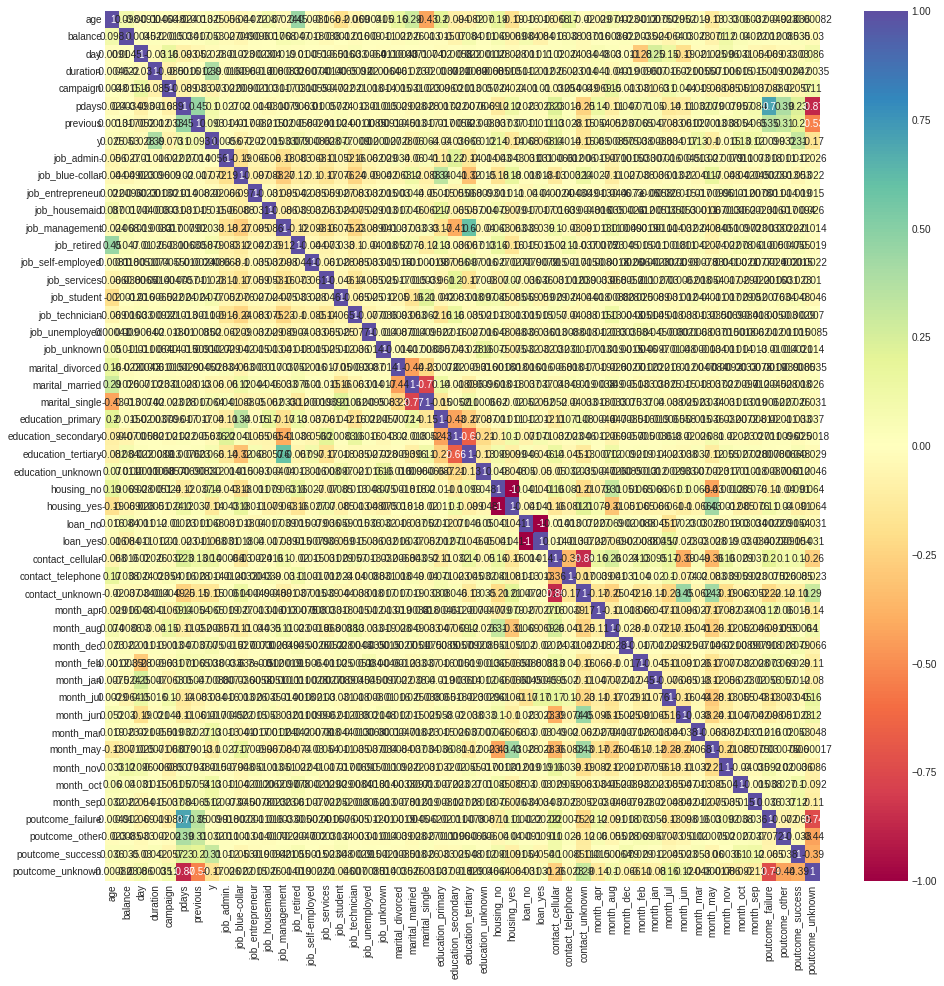

In [188]:
plt.figure(figsize=(16, 16))
sns.heatmap(Bank_Marketingdf_new.corr(), annot=True, cmap='Spectral')
plt.show()

In [189]:
Bank_Marketingdf_new.corr()['y']

age                    0.025155
balance                0.052838
day                   -0.028348
duration               0.394521
campaign              -0.073172
pdays                  0.103621
previous               0.093236
y                      1.000000
job_admin.             0.005637
job_blue-collar       -0.072083
job_entrepreneur      -0.019662
job_housemaid         -0.015195
job_management         0.032919
job_retired            0.079245
job_self-employed      0.000855
job_services          -0.027864
job_student            0.076897
job_technician        -0.008970
job_unemployed         0.020390
job_unknown            0.000267
marital_divorced       0.002772
marital_married       -0.060260
marital_single         0.063526
education_primary     -0.040393
education_secondary   -0.036388
education_tertiary     0.066448
education_unknown      0.012053
housing_no             0.139173
housing_yes           -0.139173
loan_no                0.068185
loan_yes              -0.068185
contact_

# **Split Data Into Train and Test**

In [190]:
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
df_train, df_test = train_test_split(Bank_Marketingdf_new, train_size = 0.8, random_state = 100)

In [191]:
print("Train Dataset: "+ str(len(df_train)) + " Test Dataset: " + str(len(df_test)))
print("Train Target Label counts: ")
print(df_train["y"].value_counts())
print("Test Target Label counts: ")
print(df_test["y"].value_counts())

Train Dataset: 36168 Test Dataset: 9043
Train Target Label counts: 
0    31918
1     4250
Name: y, dtype: int64
Test Target Label counts: 
0    8004
1    1039
Name: y, dtype: int64


In [192]:
# MinMaxScaler Object
scaler = MinMaxScaler()

In [193]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])

In [194]:
# Transform will operate on standardisation function and scales our values
df_test[var_numerical] = scaler.transform(df_test[var_numerical])

In [195]:
df_train.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
20017,0.168831,0.072822,0.233333,0.172428,0.000000,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31835,0.298701,0.086612,0.233333,0.009353,0.048387,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41232,0.532468,0.077107,0.666667,0.051240,0.000000,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10704,0.259740,0.082935,0.500000,0.082554,0.016129,0.0,0.0,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13670,0.298701,0.073475,0.266667,0.039244,0.048387,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [196]:
df_test.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14789,0.350649,0.072803,0.500000,0.031314,0.016129,0.000000,0.000000,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8968,0.298701,0.072849,0.133333,0.036194,0.000000,0.000000,0.000000,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34685,0.285714,0.081029,0.133333,0.013623,0.048387,0.000000,0.000000,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2369,0.090909,0.079776,0.400000,0.041277,0.000000,0.000000,0.000000,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36561,0.246753,0.072803,0.366667,0.128304,0.000000,0.395642,0.003636,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Dividing into X and Y sets for the model building**

In [197]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

In [198]:
# Divide the test data into X and y

y_test = df_test.pop('y')
X_test = df_test

In [199]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36168, 49), (36168,), (9043, 49), (9043,))

## Random Forest For Classification


In [200]:

class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)


In [201]:
class_forest.fit(X_train, y_train)

preds_class = class_forest.predict(X_test)

In [202]:
val_train = round(class_forest.score(X_train, y_train),2)*100
val_test = round(class_forest.score(X_test, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 99.0%
Test Set Accuracy: 90.0%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


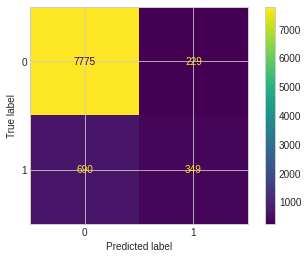

In [203]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_forest, X_test, y_test);

In [215]:
print(confusion_matrix(y_test,preds_class))

[[7775  229]
 [ 690  349]]


In [216]:
print(classification_report(y_test,preds_class))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8004
           1       0.60      0.34      0.43      1039

    accuracy                           0.90      9043
   macro avg       0.76      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043



# **Our result is acceptable to a certain extent**

### Try the random forest with gini index and plot its tree as a practice 

#### GridSearch CV Classification


In [204]:
# Classification

param_grid = {
    "n_estimators": [10,20,30], # how many trees in our forest
    "criterion": ["gini", "entropy"], # what criteria is used to split nodes
    "max_depth": [2,4,6] # how deep each decision tree can be
    
}

grid = GridSearchCV(
    class_forest,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]},
             verbose=1)

In [205]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.158102,0.016432,0.013964,0.001175,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.882499,0.882499,0.882499,0.882483,0.882483,0.882493,0.000008,13
1,0.275455,0.008701,0.020525,0.000506,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.882499,0.882499,0.882499,0.882483,0.882483,0.882493,0.000008,13
2,0.399098,0.006050,0.029883,0.005288,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.882499,0.882499,0.882499,0.882483,0.882483,0.882493,0.000008,13
3,0.208624,0.007293,0.014787,0.000238,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.887338,0.885264,0.887338,0.885801,0.886354,0.886419,0.000826,11
4,0.383432,0.009262,0.023090,0.000227,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.889135,0.887199,0.889411,0.888566,0.891884,0.889239,0.001527,8
5,0.563753,0.013233,0.031678,0.000619,gini,4,30,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.887061,0.886370,0.887338,0.888566,0.889811,0.887829,0.001219,10
6,0.268272,0.003411,0.017309,0.001767,gini,6,10,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.894941,0.892591,0.894249,0.895064,0.893543,0.894078,0.000921,4
7,0.506584,0.010781,0.026917,0.001044,gini,6,20,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.895355,0.892867,0.895355,0.895203,0.893820,0.894520,0.001008,1
8,0.751828,0.021416,0.037046,0.001247,gini,6,30,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.895079,0.893835,0.894249,0.894511,0.893820,0.894299,0.000469,3
9,0.146933,0.004179,0.014496,0.002827,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.882499,0.882499,0.882499,0.882483,0.882483,0.882493,0.000008,13


In [206]:
parameters = ['param_criterion','param_max_depth','param_n_estimators','mean_test_score','rank_test_score']

grid_df[parameters]

,param_criterion,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
0,gini,2,10,0.882493,13
1,gini,2,20,0.882493,13
2,gini,2,30,0.882493,13
3,gini,4,10,0.886419,11
4,gini,4,20,0.889239,8
5,gini,4,30,0.887829,10
6,gini,6,10,0.894078,4
7,gini,6,20,0.894520,1
8,gini,6,30,0.894299,3
9,entropy,2,10,0.882493,13


In [207]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_criterion,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
7,gini,6,20,0.894520,1
17,entropy,6,30,0.894299,2
8,gini,6,30,0.894299,3
6,gini,6,10,0.894078,4
16,entropy,6,20,0.894050,5
15,entropy,6,10,0.893746,6
13,entropy,4,20,0.890594,7
4,gini,4,20,0.889239,8
14,entropy,4,30,0.888714,9
5,gini,4,30,0.887829,10


In [208]:
grid.best_score_

0.8945200172113795

In [209]:
grid.score(X_test, y_test)

0.8959416122968041

In [210]:
# Note: we only choose one possibility --> the one happens first 
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 20}

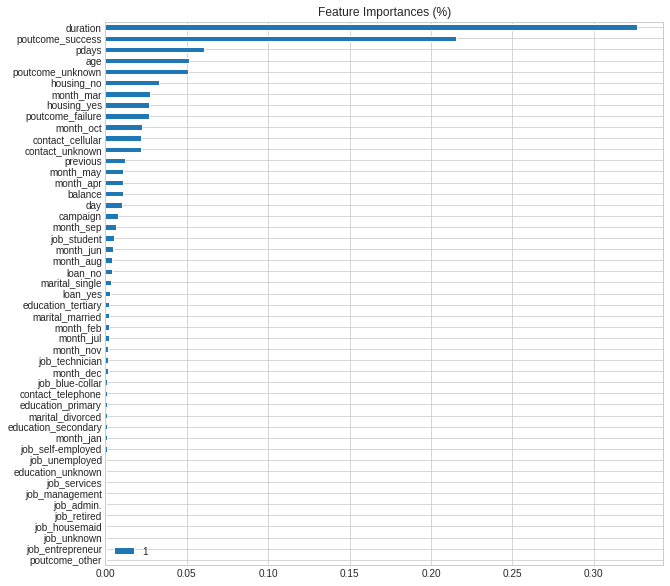

In [211]:
# Plot Feature Importances to Visualize better
# Note: Visualization is for the best model --> grid.best_params_

pd.DataFrame(dict(zip(X_train.columns, grid.best_estimator_.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)", figsize=(10,10));

In [212]:
grid.best_estimator_.estimators_

[DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1819583497),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state

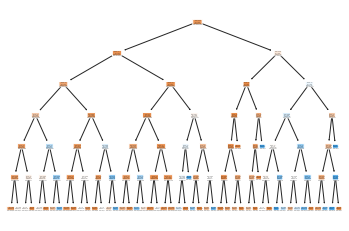

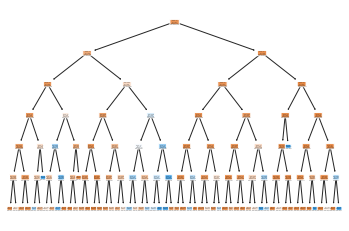

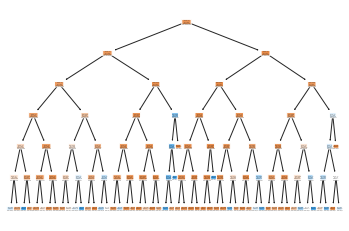

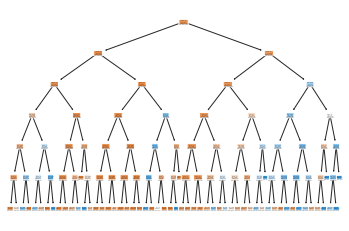

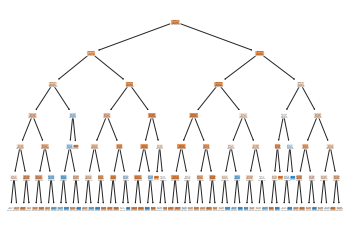

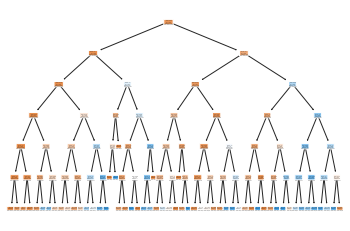

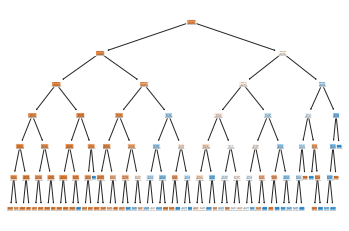

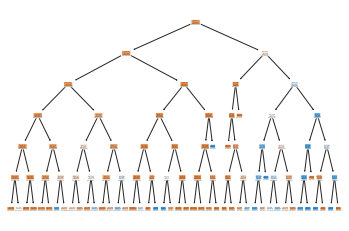

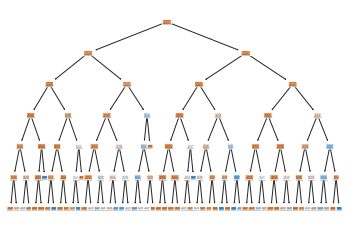

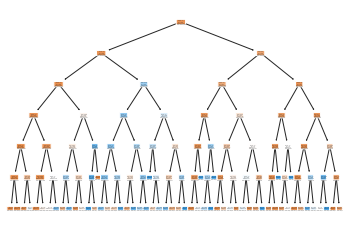

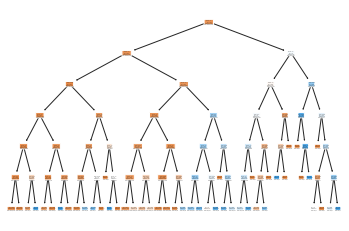

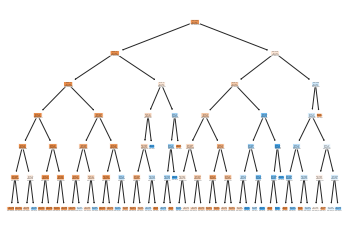

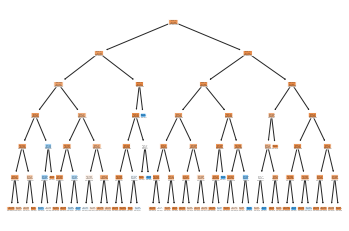

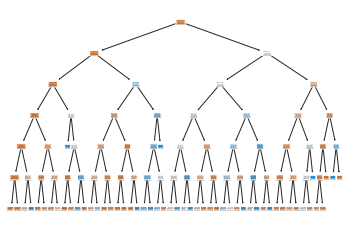

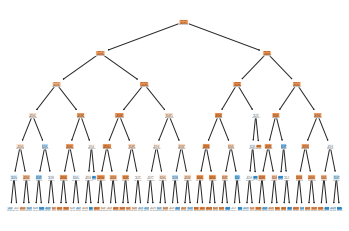

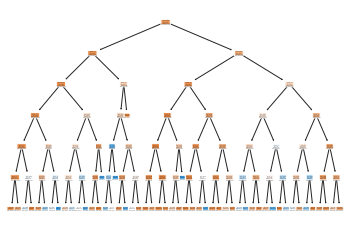

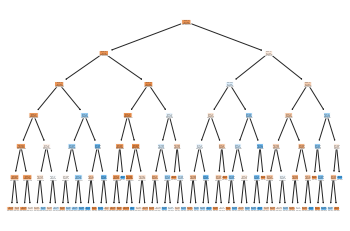

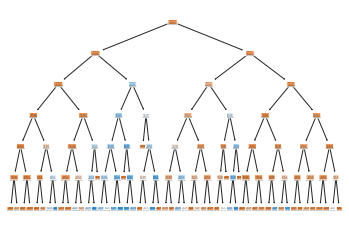

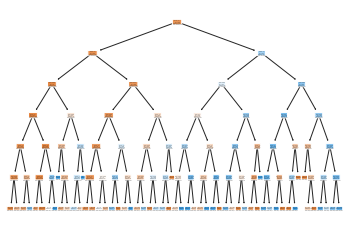

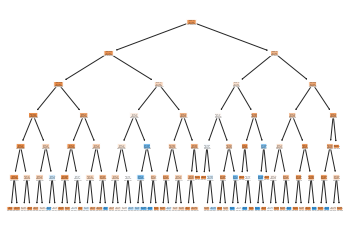

In [213]:
# Plot the Decision Trees from the Grid Search Random Forest
for x in range(len(grid.best_estimator_.estimators_)):
    tree.plot_tree(
    grid.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()